## In this project we will build a spam detection filter

### We will use the UCI listing of data sets to find the SMS Spam Collection Data Sets. We'll be using this repository to buid our spam detection program. It's a bunch of text/sms data that helps separate 'spam' (junk) or 'ham'- which is just a normal text message (not necessarily grammatically correct). Using such a repository, we enhance our ability to make a spam detection filter with Python!

### But how does it do this?? Well- it contains ~ 5,000 sms/text meassages sent by users of the Yelp app (completely legal). The teachers of this class do not want not to read any specific text tied to any specific person, we are just trying to use some of the data to help screen spam. The information is at the UCI 

In [1]:
pip install nltk

You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import nltk

In [3]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [ ] cess_esp............ CESS-ESP Treebank
  [ ] chat80.....

    Error loading stopwprds: Package 'stopwprds' not found in index



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords


      Package stopwords is already up-to-date!



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [4]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [5]:
print(len(messages))

5574


In [6]:
messages[50]

'ham\tWhat you thinked about me. First time you saw me in class.'

#### Lets print out the first ten messages

In [7]:
for mess_no,message in enumerate(messages[:10]):
    print(mess_no,message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

In [8]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [9]:
import pandas as pd

In [10]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection',sep='\t',
                       names=['label', 'message'])

In [11]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [13]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [14]:
messages['length'] = messages['message'].apply(len)

In [15]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [16]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


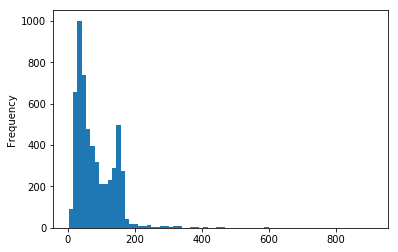

In [37]:
#possibly the length of the message is an indicator of ham/spam
messages['length'].plot.hist(bins=70)

In [18]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [19]:
messages[messages['length']==910]['message']

1085    For me the love should start with attraction.i...
Name: message, dtype: object

In [20]:
#print out entire string
messages[messages['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

#### Clearly the length of messages is a factor in the ham/spam pantheon

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12395b850>,
      dtype=object)

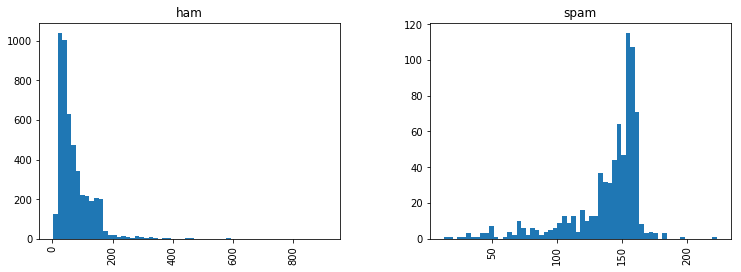

In [21]:
messages.hist(column ='length', by='label',bins=60,figsize=(12,4))

## Text Preprocessing

In [22]:
import string

In [23]:
mess = 'Sample message! Notice; it has punctuation.'

In [24]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [25]:
nopunc = [c for c in mess if c not in string.punctuation]

In [69]:
#we now remove all the punctuation
nopunc


['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [26]:
from nltk.corpus import stopwords


In [27]:
nopunc = ''.join(nopunc)

In [28]:
nopunc

'Sample message Notice it has punctuation'

In [29]:
#how the .join thing works
x = ['a','b','c','d']

In [30]:
x


['a', 'b', 'c', 'd']

so the ,join function will join together the letters with whatever you want, e.g.

In [31]:
'+++'.join(x)

'a+++b+++c+++d'

In [32]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [33]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [34]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [35]:
# put everything into a function to tie it all up

In [36]:
def text_process(mess):
    
    """
    1. remove punc
    2. remove stop words
    3. return list of clean text words
    """
    nopunc = [char for char in mess if char not in string.punctuation]    
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower()not in stopwords.words('english')]



In [37]:
# tokenize messages
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [38]:
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

so we've re moved any stopwords and we create a list of tokens (the important words we want)

In [39]:
from sklearn.feature_extraction.text import CountVectorizer

In [40]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [41]:
print(len(bow_transformer.vocabulary_))

11425


In [42]:
mess4 = messages['message'][3]

In [43]:
print(mess4)

U dun say so early hor... U c already then say...


In [44]:
bow4 = bow_transformer.transform([mess4])

In [45]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [46]:
print(bow4.shape)

(1, 11425)


In [47]:
bow_transformer.get_feature_names()[9554]

'say'

In [50]:
messages_bow = bow_transformer.transform(messages['message'])

In [52]:
print('Shape of Sparse Matrix: ', messages_bow.shape)

Shape of Sparse Matrix:  (5572, 11425)


In [53]:
# of non-zero occurencess
messages_bow.nnz

50548

In [60]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(sparsity))

sparsity: 0.07940295412668218


In [62]:
#term frquency inververse document frequency = tfidf
from sklearn.feature_extraction.text import TfidfTransformer

In [65]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [71]:
tfidf4 = tfidf_transformer.transform(bow4)

In [72]:
# we have an inverse document frequency and term frequency relationship for this particular message
# a simple word count has now been transformed into a tfidf
# interpret each number as a weight value for each word in the text 
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [74]:
#so if I want to see the trfidf4 of a particuar word like 'university'
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [75]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [77]:
from sklearn.naive_bayes import MultinomialNB

In [78]:
spam_detect_model = MultinomialNB

In [81]:
spam_detect_model = MultinomialNB().fit(messages_tfidf,messages['label'])

In [82]:
#see if model predicts accurately  
spam_detect_model.predict(tfidf4)[0]

'ham'

In [83]:
messages

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147
6,ham,Even my brother is not like to speak with me. ...,77
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160
8,spam,WINNER!! As a valued network customer you have...,157
9,spam,Had your mobile 11 months or more? U R entitle...,154


In [85]:
messages['label'][3]

'ham'

In [86]:
all_pred=spam_detect_model.predict(messages_tfidf)

In [87]:
all_pred


array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [89]:
from sklearn.model_selection import train_test_split

In [92]:
msg_train,msg_test,label_train,label_test = train_test_split(messages['message'], messages['label'], test_size = 0.3)

In [93]:
from sklearn.pipeline import Pipeline

In [95]:
  pipeline = Pipeline([
      ('bow', CountVectorizer(analyzer= text_process)),
      ('tfidf', TfidfTransformer()),
      ('classifier', MultinomialNB())
  ])

In [96]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x123d48830>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [98]:
predictions = pipeline.predict(msg_test)

In [105]:
from sklearn.metrics import classification_report

In [106]:
print(classification_report(label_test,predictions))

              precision    recall  f1-score   support

         ham       0.94      1.00      0.97      1435
        spam       1.00      0.64      0.78       237

    accuracy                           0.95      1672
   macro avg       0.97      0.82      0.88      1672
weighted avg       0.95      0.95      0.94      1672

